<a href="https://colab.research.google.com/github/natalia2000-jpg/Machine-learning/blob/main/%CE%95%CF%81%CE%B3%CE%B1%CF%83%CE%AF%CE%B1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Εργασία 2 – Δέντρα Απόφασης & Τυχαία Δάση


όνομα:Ναταλία Ταμβακίδου ΑΕΜ:200

#Εισαγωγή Βιβλιοθηκών

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from itertools import product

#Ερώτημα 1

In [33]:
#φόρτωση- Εμφάνιση Δεδομένων
df=pd.read_csv('water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [34]:
#Περιγραφή Δεδομένων
print(df.describe())

                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  


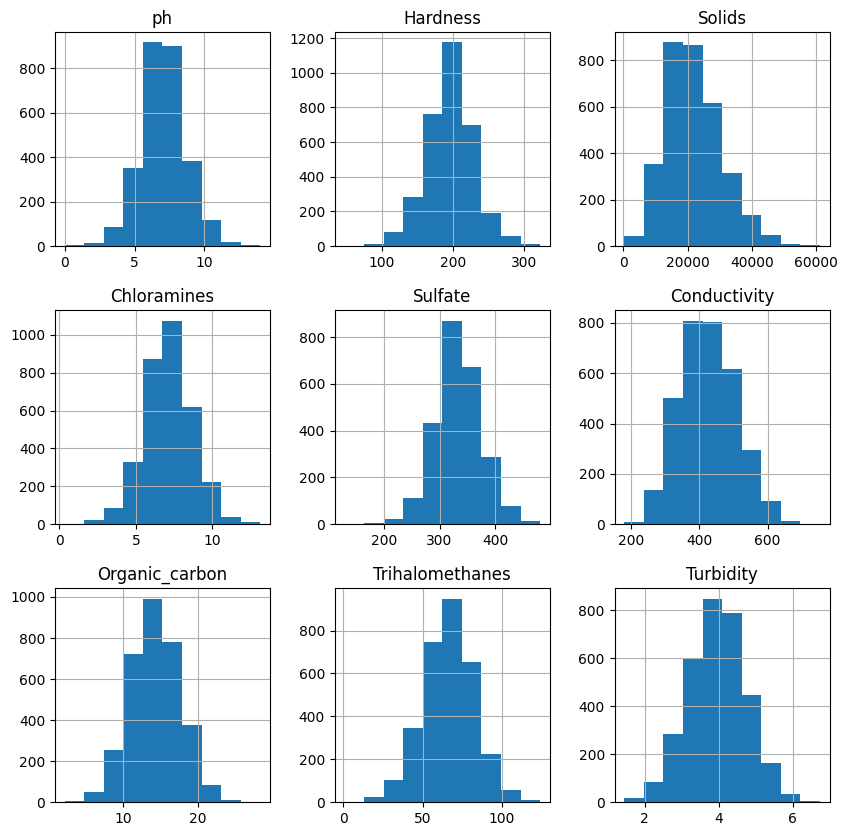

In [35]:
#Γραφική απεικόνιση χαρακτηριστικών
features=["ph","Hardness","Solids","Chloramines","Sulfate","Conductivity","Organic_carbon","Trihalomethanes","Turbidity"]
df[features].hist(figsize=(10,10))
plt.show()

Σχόλιο:
Παρατηρώντας τα ιστογράμματων των χαρακτηριστικών θα λέγαμε ότι μεταβλητές όπως το Hardness και το Organic_carbon εμανίζουν σχετικά συμμετρικές κατανομές, που πλησιάζουν την κανονική.Ωστόσο,τα περισσότερα χαρακτηριστικά παρουσιάζουν ασυμμετρία και ακραίες τιμές.

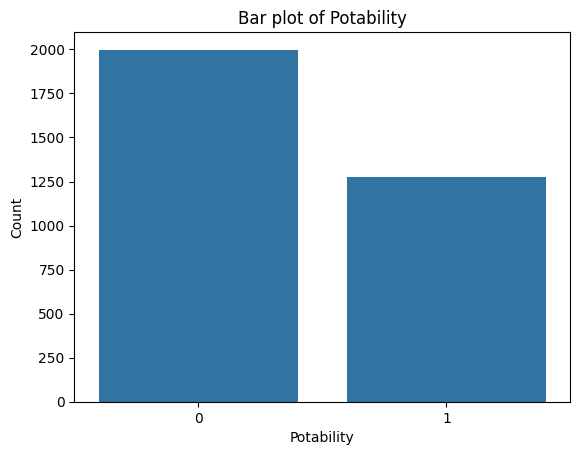

In [36]:
sns.countplot(x='Potability',data=df)
plt.title("Bar plot of Potability")
plt.xlabel('Potability')
plt.ylabel('Count')
plt.show()

Σχόλιο: Παρατηρούμε ότι υπάρχει σημαντική διαφορά μεταξύ των δύο κλάσεων.Αυτό δείχνει ότι το σύνολο των δεδομένω είναι αρκετά ανομοιογενές καθώς καμία κλάση δεν υπερισχύει απόλυτα.Συνεπώς,η εντροπία είναι αρκετά μεγάλη.

In [37]:
#Εύρεση των ελειπών τιμών ανα χαρακτηριστικό
missing_values = df.isnull().sum()
print(missing_values)

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [38]:
#Εύρεση ποσοστού πόσιμου και μη ποόσιμου νερού
potability_counts = df['Potability'].value_counts()
potability_percent= df['Potability'].value_counts(normalize=True) * 100
potability_stats=pd.DataFrame({'Count': potability_counts, 'Percentage': potability_percent})
print(potability_stats)

            Count  Percentage
Potability                   
0            1998   60.989011
1            1278   39.010989


Σχόλιο:Παρατηρούμε ότι υπάρχουν αρκετές ελείψεις στις τιμές των χαρακτηριστικών και ειδικότερα στο χαρακτηριστικό Sulfade.Αυτό είναι ένα γεγονός που θα προκαλέσει πρόβλημα στην πληρότητα του dataset.Ακόμα όπως σχολίασαμε και στο ραβδόγραμα, αλλά και τώρα βλέπωντας τις ακριβείς μετρήσεις, υπάρχει μεγάλη διαφορά ανάμεσα στις δύο κλάσεις με την κλάση μη πόσιμο να υπερισχύει και δημιουργείται ανομοιογένεια.Συωολικά,η ποιότητα των δεδομένων μπορεί να χαρακτηριστεί μέτρια,καθώς απαιτείται προεπεξεργαία πριν την μοντελοποίηση.

#Ερώτημα 2

In [39]:
#φιλτρο για κάθε κατηγορία
non_drinking_water=df[(df["ph"]<6.5)|(df["ph"]>8.5)]
drinking_water=df[(df["ph"]>=6.5)&(df["ph"]<=8.5)]
def potability_percentage(subset):
  counts=subset["Potability"].value_counts(normalize=True)*100
  return counts
print("μη πόσιμο νερό με βάση τον οργανισμό")
print(potability_percentage(non_drinking_water))
print("πόσιμο νερό με βάση τον οργανισμό")
print(potability_percentage(drinking_water))

μη πόσιμο νερό με βάση τον οργανισμό
Potability
0    64.447495
1    35.552505
Name: proportion, dtype: float64
πόσιμο νερό με βάση τον οργανισμό
Potability
0    56.099398
1    43.900602
Name: proportion, dtype: float64


Σχόλιο: με βάση τις τιμές του ph που έχουν δωθεί απο τον ΠΟΥ υπάρχει:
*   ένα ποσοστο 56% των δειγμάτων με ph που είναι εντός επιτρεπτού εύρους χαρακτηρίζοντα ως μη πόσιμα
*  ενώ ένα ποσοστό 35,6% των δειγμάτων με ph εκτός του επιτρεπτού εύρους χαρακτηρίζοντα ως πόσιμα.

Συνεπώς,η σχέση μεταξύ ph και ποσιμότητας επληθεύεται μόνο μερικώς, καθώς το ph από μόνο του δεν αρκει για καθορίσει αν το νερό είναι ασφαλές προς κατάπωση.




---







#Ερώτημα 3

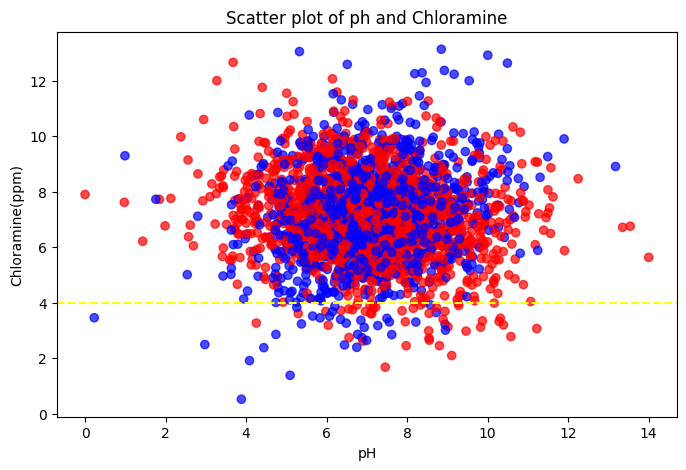

In [40]:
#δημιουργία διαγράματος διασποράς
#μη πόσιμα ->κοκκινο
#πόσιμα->μπλε

colors=df["Potability"].map({0:"red",1:"blue"})
plt.figure(figsize=(8,5))
plt.scatter(df["ph"],df["Chloramines"],c=colors,alpha=0.7)
plt.xlabel("pH")
plt.ylabel("Chloramine(ppm)")
plt.title("Scatter plot of ph and Chloramine")
plt.axhline(y=4,color="yellow",linestyle="--",label="Προτεινόμενο όριο Chloramine (4pm)")

plt.show()

Σχόλιο:Στο διάγραμμα διασποράς μεταξύ ph και Chloramine,έχουμε με μπλέ χρώμα τα πόσιμα παραδείγματα και με κοκκόκινα τα μη πόσιμα.Επίσης, η διακεκομμένη ευθεία υποδεικνυει το προτεινόμενο όριο Chloramine απο τον ΠΟΥ.Παρατηρούμε οτι τα μπλε και κόκκινα σημεία αναμιγνύονται σε πολλές περιοχές του γραφήματος,γεγονόσ που δείχνει ότι το νερό δεν μπορει να διαχωριστεί πλήρως σε πόσιμα και μη πόσιμα μόνο με βάση το ph.Ακόμα, παρατηρούμε ότι υπάρχουν πολλά πόσιμα δείγματα που έχουν περισσότερη Chloramine από ότι έχει ορίσει ο ΠΟΥ.Αυτό σημαίνει ότι η Chloramine, δεν είναι ούτε αυτό επερκές χαρακτηριστικό για να κρίνουμε αν το νερό είναι πόσιμο ή οχι.



#Ερώτημα 4

In [41]:
df["ph"]=df["ph"].fillna(df["ph"].mean())
df["Sulfate"]=df["Sulfate"].fillna(df["Sulfate"].mean())
df["Trihalomethanes"]=df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean())

Σχόλιο:Εντοπίσαμε σε προηγούμενο ερώτημα ελειπές τιμές στα χαρακτηριστικά ph,Sulfate,Trihalomethanes.Αντικαταστήσαμε τις ελειπές τιμές με τον μέσο όρο κάθε χαρακτηριστικού.Το βήμα αυτό είναι απαραίτητο, καθώς τα μοντέλα δέντρων απόφασης της scikit-learn δεν υποστηρίζουν ελειπές τιμές.

#Ερώτημα 5

In [42]:
X=df.drop("Potability",axis=1).values
Y=df["Potability"].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2293, 9)
(983, 9)
(2293,)
(983,)


Σχόλιο:Χωρίσαμε το σύνολο των δειγμάτων μας έτσι ώστε το 70% των δειγμάτων να χρησιμοποιηθούν για την εκπαίδευση του μοντέλου και το 30% για να κάνουμε έλεγχο.

#Ερώτημα 6

In [43]:
#Δημιουργία και εκπαίδευση μοντέλου
model=DecisionTreeClassifier(random_state=0)
model.fit(X_train,Y_train)
#προβλέψεις για το train και test
Y_train_pred=model.predict(X_train)
Y_test_pred=model.predict(X_test)
#Ακρίβεια
train_accuracy=accuracy_score(Y_train,Y_train_pred)
test_accuracy=accuracy_score(Y_test,Y_test_pred)
print("Train Accuracy:",train_accuracy)
print("Test Accuracy:",test_accuracy)



Train Accuracy: 1.0
Test Accuracy: 0.5747711088504578


Σχόλιο:Παρατητούμε ότι η ακρίβεια στο training set φτάνει στο 100%,αλλά στο test set 58% και αυτό είναι κάτι που δείχνει overfitting.Δηλαδή το μοντέλο μας εκπαιδεύτηκε πολύ καλά στα δεδομένα εκπαίδευσης αλλά δεν γενικεύει σωστά σε νέα δεδομένα.

#Ερώρημα 7

In [44]:
#ορισμό όλων των τιμών της παραμέτρου
criteria=["gini","entropy"]
max_depths=[None,3,5]
min_splits=[2,5]
min_leaves=[1,2]
max_features=[None,"sqrt"]
ccp_alphas=[0,0.01]
results=[]
#Δημιουργία μοντελου με τις συγκεκριμένες παραμέτρους
for crit,depth,split,leaf,feat,alpha in product(criteria,max_depths,min_splits,min_leaves,max_features,ccp_alphas):
  model=DecisionTreeClassifier(criterion=crit,max_depth=depth,min_samples_split=split,min_samples_leaf=leaf,max_features=feat,ccp_alpha=alpha,random_state=0)
  #Εκπαίδευση και πρόβλεψη
  model.fit(X_train,Y_train)
  Y_train_pred=model.predict(X_train)
  Y_test_pred=model.predict(X_test)
  #Ακρίβεια
  train_accuracy=accuracy_score(Y_train,Y_train_pred)
  test_accuracy=accuracy_score(Y_test,Y_test_pred)
  #Αποθήκευση αποτελεσμάτων
  results.append({"criterion":crit,"max_depth":depth,"min_samples_split":split,"min_samples_leaf":leaf,"max_fatures":feat,"ccp_alpha":alpha,"train_accuracy":train_accuracy,"test_accuracy":test_accuracy})
results_df=pd.DataFrame(results)
print(results_df)


   criterion  max_depth  min_samples_split  min_samples_leaf max_fatures  \
0       gini        NaN                  2                 1        None   
1       gini        NaN                  2                 1        None   
2       gini        NaN                  2                 1        sqrt   
3       gini        NaN                  2                 1        sqrt   
4       gini        NaN                  2                 2        None   
..       ...        ...                ...               ...         ...   
91   entropy        5.0                  5                 1        sqrt   
92   entropy        5.0                  5                 2        None   
93   entropy        5.0                  5                 2        None   
94   entropy        5.0                  5                 2        sqrt   
95   entropy        5.0                  5                 2        sqrt   

    ccp_alpha  train_accuracy  test_accuracy  
0        0.00        1.000000       0.57

Σχόλιο: Παρατηρούμε ότι

*   Τα δέντρα με βάθος χωρίς όριο εμφανίζουν πολυ υψηλή ακρίβεια στο training set αλλά αρκετά χαμηλή στο test sest,γεγονός που δείχνει overftting.
* Όταν περιορίστηκε το βάθος σε 5 και αυξήθηκε ο ελάχιστος αριθμός δειγμάτων ανα κόμβο σε 5, η ακρίβεια στο test set βελτιώθηκε.Τέλος, στις περιπτώσεις όπου και η παράμετρος είναι ccp_alpha=0.01 βλέπουμε μια παραπάνω βελτίωση.





#Ερώτημα 8

In [45]:
results_depth3=results_df[results_df["max_depth"]==3]
results_depth3=results_depth3.sort_values(by="test_accuracy",ascending=False)
best_results_depth3=results_depth3.head(1)
print(best_results_depth3)


   criterion  max_depth  min_samples_split  min_samples_leaf max_fatures  \
72   entropy        3.0                  5                 1        None   

    ccp_alpha  train_accuracy  test_accuracy  
72        0.0        0.641082       0.639878  


In [46]:
#Εκπαίδευση μοντέλου με βάση το best_results_depth3
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)
model=DecisionTreeClassifier(criterion="entropy",max_depth=3,min_samples_split=5,min_samples_leaf=1,max_features=None,ccp_alpha=0.00,random_state=0)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=5,
                       random_state=0)

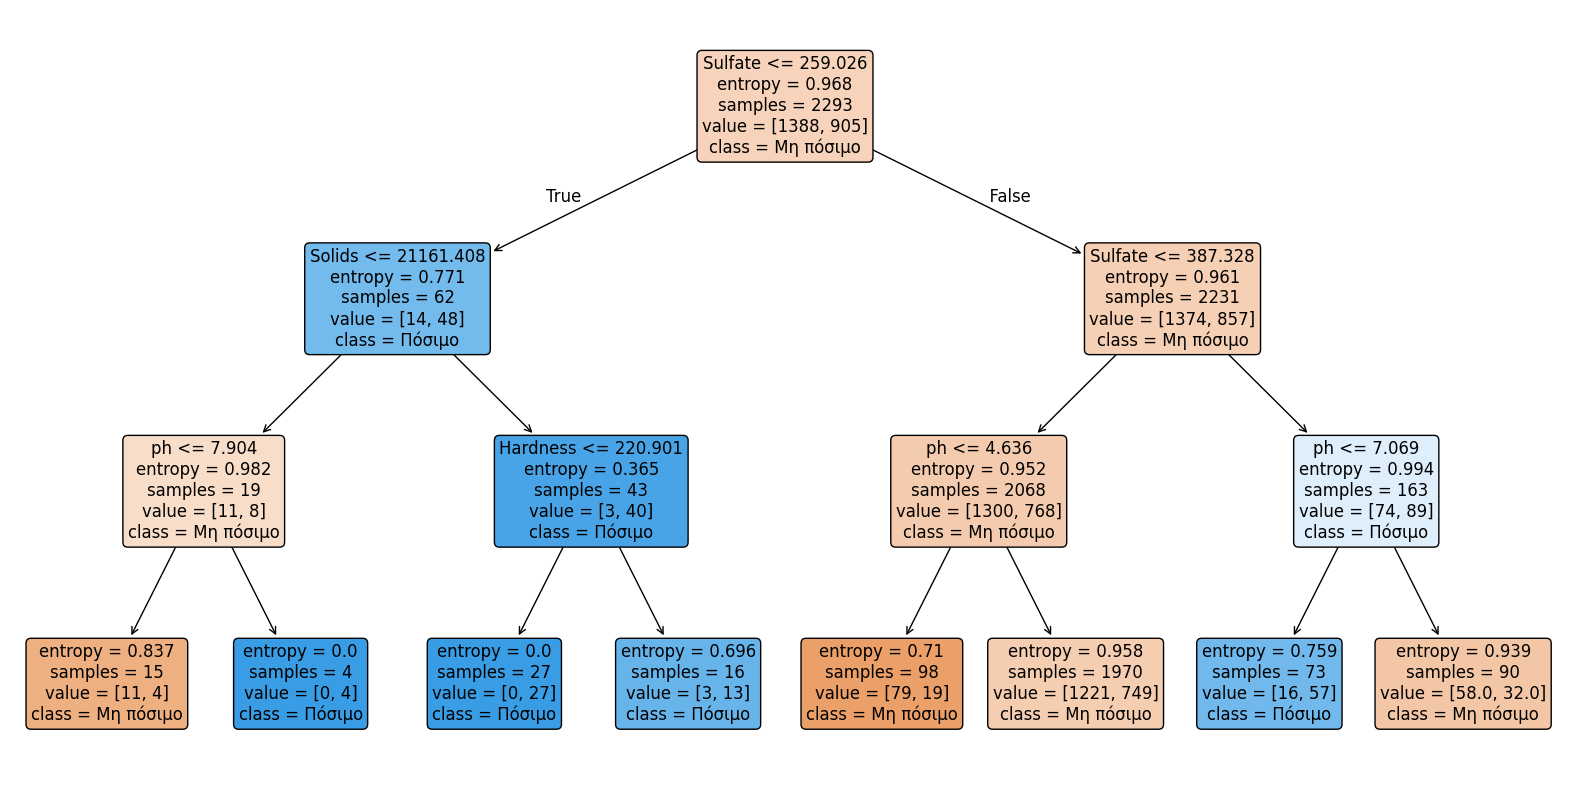

In [47]:
plt.figure(figsize=(20,10))
plot_tree(model,feature_names=df.drop("Potability",axis=1).columns,class_names=["Μη πόσιμο","Πόσιμο"],filled=True,rounded=True)
plt.show()

Σχόλιο: Στο καλύτερο δέντρο με max_depth=3 παρατηρούμε ότι κάποια χαρακτηριστικά όπως τα Organic_carbon και Chloramines δεν χρησιμοποιήθηκαν για κανένα διαχωρισμό.

Αυτό οφείλεται στο γεγονός ότι τα υπόλοιπα χαρακτηριστικά ήταν πιο σημαντικά για την κατηγορία Potability και λόγω περιουρισμού βάθος το δένδρο επέλεξε τα πιο σημαντικά splits.

Το δέντρο εξάγει τους παρκάτω κανόνες:
- Αν Sulfate ≤ 259.026 και Solids ≤ 21161.408 και pH ≤ 7.904 → Μη πόσιμο
- Αν Sulfate ≤ 259.026 και Solids ≤ 21161.408 και pH > 7.904 και Hardness ≤ 220.901 → Μη πόσιμο
- Αν Sulfate ≤ 259.026 και Solids ≤ 21161.408 και pH > 7.904 και Hardness > 220.901 → Μη πόσιμο
- Αν Sulfate > 259.026 και Sulfate ≤ 387.283 και pH ≤ 6.636 → Κατηγορία = F
- Αν Sulfate > 259.026 και Sulfate ≤ 387.283 και pH > 6.636 → Πόσιμο
- Αν Sulfate > 387.283 και pH ≤ 7.069 → Πόσιμο
- Αν Sulfate > 387.283 και pH > 7.069 → Μη Πόσιο (με μικρή αβεβαιότητα)


#Ερώτημα 9

In [48]:
#εύρεση του συνδυασμού με την μεγγαλύτερη τιμή στο accuracy_test
results_best_test_accuracy=results_df.sort_values(by="test_accuracy",ascending=False)
best_results_best_test_accuracy=results_best_test_accuracy.head(1)
print(best_results_best_test_accuracy)



   criterion  max_depth  min_samples_split  min_samples_leaf max_fatures  \
92   entropy        5.0                  5                 2        None   

    ccp_alpha  train_accuracy  test_accuracy  
92        0.0        0.671173       0.655137  


In [49]:
#εκπαίδευση με βάση την γραμμή που βρήκαμε από το dataframe results
model=DecisionTreeClassifier(criterion="entropy",max_depth=5,min_samples_split=5,min_samples_leaf=2,max_features=None,ccp_alpha=0.00,random_state=0)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=5, random_state=0)

In [50]:
features=df.drop("Potability",axis=1).columns
#Παίρνουμε τα σημαντικότητα κάθε χαρακτηριστικού
importances=model.feature_importances_
feature_importances=pd.DataFrame({"Feature":features,"Importance":importances})
#ταξινομούμε με με φθίνουσα σειρά
feature_importances=feature_importances.sort_values(by="Importance",ascending=False)
print("Σημαντικότητα των χαρακτηριστικών")
print(feature_importances)



Σημαντικότητα των χαρακτηριστικών
           Feature  Importance
4          Sulfate    0.298956
0               ph    0.244768
3      Chloramines    0.191956
1         Hardness    0.091392
2           Solids    0.086400
7  Trihalomethanes    0.053536
8        Turbidity    0.020127
5     Conductivity    0.012864
6   Organic_carbon    0.000000


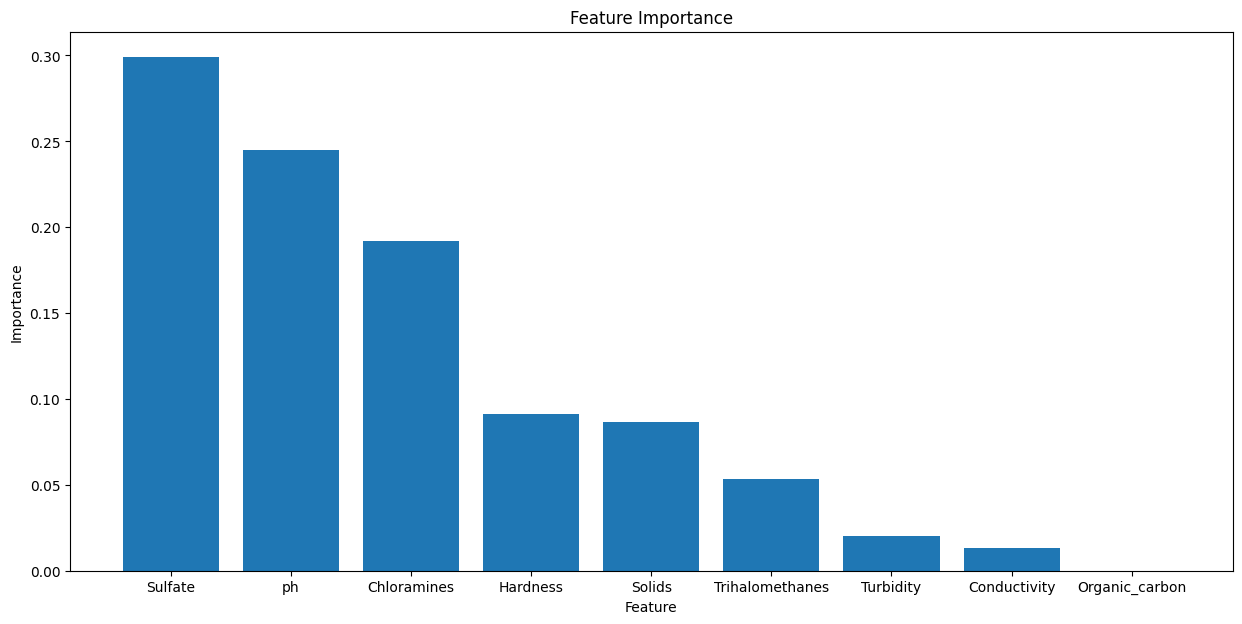

In [51]:
plt.figure(figsize=(15,7))
plt.bar(feature_importances["Feature"],feature_importances["Importance"])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

In [52]:
#επιλογή των τοπ 5 χαρακτηριστικών
feature_importances_top5=feature_importances.head(5)
print("Τα 5 πιο σημαντικά χαρακτηριστικά")
print(feature_importances_top5)

Τα 5 πιο σημαντικά χαρακτηριστικά
       Feature  Importance
4      Sulfate    0.298956
0           ph    0.244768
3  Chloramines    0.191956
1     Hardness    0.091392
2       Solids    0.086400


Σχόλιο:

Από το ραβδόγραμμα των σημαντικοτήτων των χαρακτηριστικών παρατηρούε ότι το Sulfate παρουσιάζει την υψηλότερη σημασία.Ωστόσο, η υψηλή σημασία του μπορεί να μην οφείλεται στην πργματική σχέση με την Potability αλλά στο γεγονός ότι έγινε μεγάλη αναpλήρωση ελλειπών τιμών με mean.






#Ερώτημα 11

Λόγοι για τους οποίους ένα Random Forest θα πετύχαινε καλύτερη ακρίβεια από το Δέντρο απόφασισης:
*   Όπως είδαμε και στο ερώτημα 6 το Δέντρο απόφασης παρουσιάζει overfitting και αυτό είναι κάτι που θα μπορούσαμε να αποφύγουμε με την χρήση ενός Random Forest μιας και αυτό δημιουργεί πολλά δέντρα σε τυχαία υποσύνολα των δεδομένων και των χαρακτηριστικών.
*  Ακόμα το Random Forest οφειλόμενο στην ικανότητα να δημιουργεί πολλά δέντρα έχει την δυνατότητα να συνδυάσει πολλές προβλέψεις και έτσι να μην κυριαρχεί μόνο ένα πολύ ισχυρό χαρακτηριστικό


#Ερώτημα 12


In [53]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)
#ορισμό όλων των τιμών της παραμέτρου
criteria=["gini","entropy"]
max_depths=[None,3,5]
min_splits=[2,5]
min_leaves=[1,2]
max_features=[None,"sqrt"]
ccp_alphas=[0,0.01]
n_estimators=[50,100,200]
results_rf=[]
#Δημιουργία μοντελου με τις συγκεκριμένες παραμέτρους
for crit,depth,split,leaf,feat,alpha,n_est in product(criteria,max_depths,min_splits,min_leaves,max_features,ccp_alphas,n_estimators):
  model=RandomForestClassifier(criterion=crit,max_depth=depth,min_samples_split=split,min_samples_leaf=leaf,max_features=feat,ccp_alpha=alpha,n_estimators=n_est,random_state=0)
  #Εκπαίδευση και πρόβλεψη
  model.fit(X_train,Y_train)
  Y_train_pred=model.predict(X_train)
  Y_test_pred=model.predict(X_test)
  #Ακρίβεια
  train_accuracy=accuracy_score(Y_train,Y_train_pred)
  test_accuracy=accuracy_score(Y_test,Y_test_pred)
  #Αποθήκευση αποτελεσμάτων
  results_rf.append({"criterion":crit,"max_depth":depth,"min_samples_split":split,"min_samples_leaf":leaf,"max_fatures":feat,"ccp_alpha":alpha,"n_estimators":n_est,"train_accuracy":train_accuracy,"test_accuracy":test_accuracy})
results_rf_df=pd.DataFrame(results_rf)
print(results_rf_df)

    criterion  max_depth  min_samples_split  min_samples_leaf max_fatures  \
0        gini        NaN                  2                 1        None   
1        gini        NaN                  2                 1        None   
2        gini        NaN                  2                 1        None   
3        gini        NaN                  2                 1        None   
4        gini        NaN                  2                 1        None   
..        ...        ...                ...               ...         ...   
283   entropy        5.0                  5                 2        sqrt   
284   entropy        5.0                  5                 2        sqrt   
285   entropy        5.0                  5                 2        sqrt   
286   entropy        5.0                  5                 2        sqrt   
287   entropy        5.0                  5                 2        sqrt   

     ccp_alpha  n_estimators  train_accuracy  test_accuracy  
0         0.0

In [54]:
#εύρεση του συνδυασμού με την μεγγαλύτερη τιμή στο accuracy_test
results_rf_best_test_accuracy=results_rf_df.sort_values(by="test_accuracy",ascending=False)
best_results_rf_best_test_accuracy=results_rf_best_test_accuracy.head(1)
print(best_results_rf_best_test_accuracy)



  criterion  max_depth  min_samples_split  min_samples_leaf max_fatures  \
7      gini        NaN                  2                 1        sqrt   

   ccp_alpha  n_estimators  train_accuracy  test_accuracy  
7        0.0           100             1.0       0.697864  


In [55]:
#εκπαίδευση του μοντέλου
model=RandomForestClassifier(criterion="gini",max_depth=None,min_samples_split=2,min_samples_leaf=1,max_features="sqrt",ccp_alpha=0.00,n_estimators=100,random_state=0)

In [56]:
model.fit(X_train,Y_train)


RandomForestClassifier(random_state=0)

In [57]:
#Παίρνουμε τα σημαντικότητα κάθε χαρακτηριστικού
importances=model.feature_importances_
feature_importances=pd.DataFrame({"Feature":features,"Importance":importances})
#ταξινομούμε με με φθίνουσα σειρά
feature_importances=feature_importances.sort_values(by="Importance",ascending=False)
print("Σημαντικότητα των χαρακτηριστικών")
print(feature_importances)



Σημαντικότητα των χαρακτηριστικών
           Feature  Importance
4          Sulfate    0.128689
0               ph    0.128105
1         Hardness    0.124075
3      Chloramines    0.114937
2           Solids    0.113980
5     Conductivity    0.098956
6   Organic_carbon    0.097539
8        Turbidity    0.096875
7  Trihalomethanes    0.096843


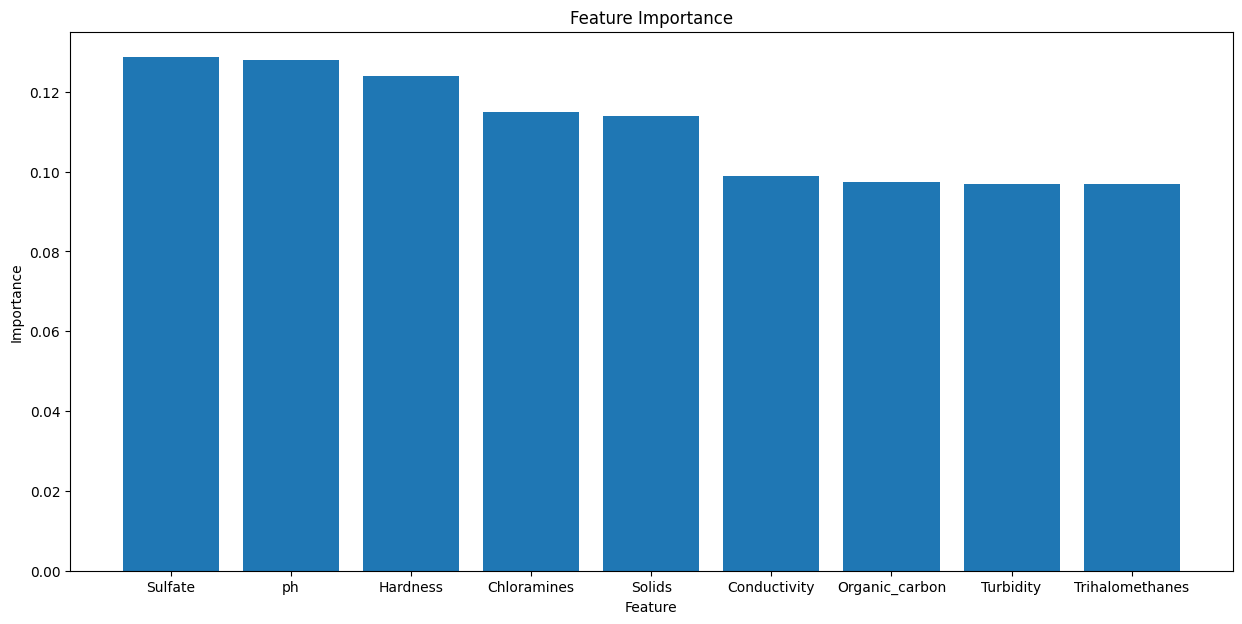

In [58]:
plt.figure(figsize=(15,7))
plt.bar(feature_importances["Feature"],feature_importances["Importance"])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

Σχόλιο:

Με την εκπαίδευση του Random Forest με τον καλύτερο συνδυασμό παραμέτρων παρατηρούμε οτι:
1. Το μοντέλο μαθαίνει πολύ καλά τα δεδομένα εκπαίδευσης(train_accuracy=1)και υπάρχει μία βελτίωση σε σχέση με το δέντρο αποφάσης στην μεταβλλητή test_accuracy,δείχνοντας μια καλύτερη γενίκευση.

2. H σημαντικότητα είναι πιο "διασκορπισμένη" λόγω του συνδυασμού πολλών τυχαίων δέντρων και τυχαίων υποσυνόλων χαρακτηριστικών.

#Ερώτημα 13

Για την ταξινόμηση της Potability, είναι πιο σημαντικό το μοντέλο να προβλέπει σωστά το μη- πόσιμο νερό, ακόμα και αν χάνει λίγη ακρίβεια στα πόσιμα.Διότι στην αντίθετη περίπτωση, μια λανθασμένη ταξινόμηση μη-πόσιμου νερού ως πόσιμο μπορει να προκαλέσει σοβαρά προβλήματα υγείας,όπως μολύνσεις ή δηλητηριάσεις.Η ασφάλεια είναι πιο σηματική απο την πλήρη αξιοποίηση των πόσιμων δειγμάτων.

#Ερώτημα 14


Παρά την μεγαλύτερη ακρίβεια που προσφέρει το Random Forest,το Δέντρο απόφασης μπορεί να θεωρηθεί νομικά πιο ασφαλές για την εταιρεία, καθώς επιτρέπει την πλήρη εξήγηση κάθε απόφασης και της τεκμηρίωσης των κανόνων.Τέλος, το Random Forest λόγω της πολυπλοκότητας του, έχει μεγαλύτερη αδιαφάνεια και πιθανώς μεγαλύτερη μεροληψία στις αποφάσεις, αυξάνοντας έτσι το κίνδυνο λαθών.